### Insurance Data:  Logistic Regression Model

## 0: Setup

#### 0.0: Library Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

#### 0.1 Read auto insurance data and rename columns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jgoodz8/3251_Project_Group2/master/AutoInsurance.csv')

data.columns = ['customer', 'state', 'clv', 'response', 'coverage_type', 'education', 'effective_to_date',\
                'employment_status', 'gender', 'income' , 'location_code', 'marital_status', 'monthly_premium',\
                'months_since_last_claim', 'months_since_policy_start', 'open_complaints', 'num_policies',\
                'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',\
                'vehicle_class', 'vehicle_size']

## Allows us to display all the columns in one go
pd.options.display.max_columns = None
data.head(5)

,customer,state,clv,response,coverage_type,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium,months_since_last_claim,months_since_policy_start,open_complaints,num_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 1: Define the problem

### 1.0 **Goal**:   
Using Logistic regression, Predict the response received through the marketing campaign.  
- ['Response'] = Yes/No

Using the following variables
1. ['renew_offer_type']
2. ['sales_channel']
3. ['gender']
4. ['income']
5. ['monthly_premium']

#### Assumptions:
- Variables were picked based on intuition (i.e assuming that Monthly Premiums are more likely to influence renewal as opposed to the gender variable.


### 1.1 Numeric Variables  
A basic histogram which showcase the 'distribution' of what the numeric variables look like

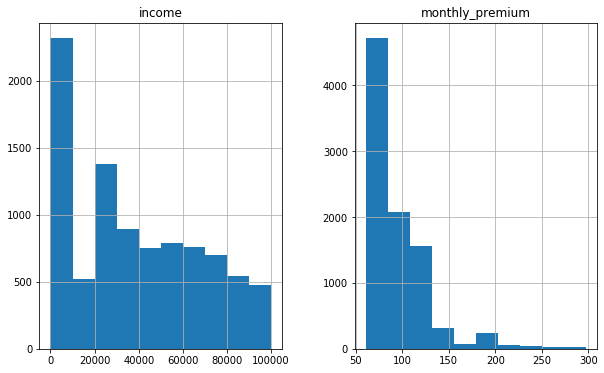

In [3]:
num_vars= ['monthly_premium','income']
data[num_vars].hist(figsize=(10,6))
plt.show()

### 1.2 Categorical Variables
A basic visualization of the distribution and counts of different options in the categorical fields.

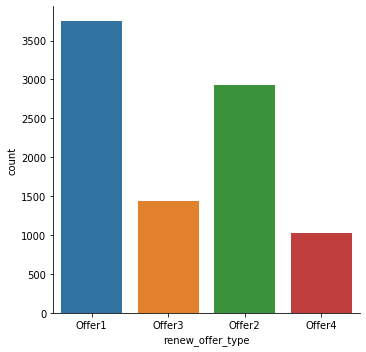

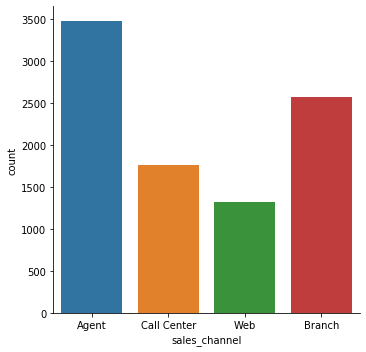

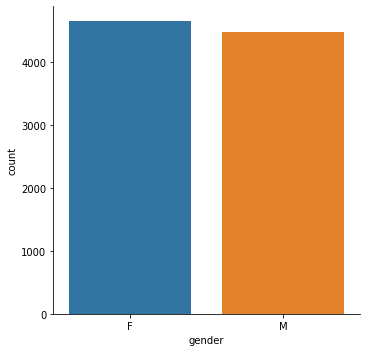

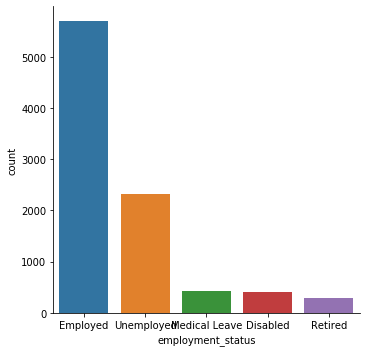

In [4]:
cat_vars = ['employment_status', 'gender', 'sales_channel', 'renew_offer_type']

sns.catplot('renew_offer_type',kind="count",data=data)
sns.catplot('sales_channel',kind="count",data=data)
sns.catplot('gender',kind="count",data=data)
sns.catplot('employment_status',kind="count",data=data)
plt.show()

### 1.3 Response Variable
A basic visualization of the distribution and counts of the Response variable

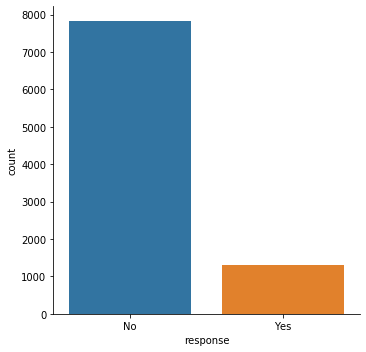

In [5]:
sns.catplot('response',kind="count",data=data)

plt.show()

#### Concern:
We can see that we have a class imbalance.
~80% of the response variable is a 'No'.  
By 'cheating' we can claim to achieve ~80% accuracy of our model by simply setting all of the responses to 'No'.

In order to avoid this bias, We'll use SMOTE **(Synthetic minority oversampling technique)** to oversample the "Yes" response in the training data.

### 2: Transformations

#### 2.1 Convert Categorical variables into binary variables in order for the logistic model to utilize them

In [6]:
data_cat= pd.get_dummies(data[cat_vars])

#### 2.2 Merge with the selected numeric variables to create a combined datamart

In [7]:
data_final = data[num_vars].join(data_cat)

#### 2.3 Convert the ['response'] = Yes/No variable into a binary [0,1] response variable

In [8]:
data_final['binary_response'] = np.where(data['response']=="Yes",1,0)
data_final.head(3)

,monthly_premium,income,employment_status_Disabled,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_F,gender_M,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,binary_response
0,69,56274,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,94,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
2,108,48767,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0


### 3: Modelling

#### 3.1 For simplification, we use:  
X= Predictors  
y= Response

In [9]:
X = data_final.loc[:, data_final.columns != 'binary_response']
y = data_final.loc[:, data_final.columns == 'binary_response']


#### 3.2 Split into train and test.

In [12]:
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 3.3 SMOTE 
As discussed in 1.3, use SMOTE (Synthetic minority oversampling technique) to oversample the "Yes" response in the training data

In [14]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=os_data_X.columns)
os_data_y = pd.DataFrame(data=os_data_y,columns=['binary_response'])

## Check the data
print("OS data length ",len(os_data_X))
print("OS 'No' response ", len(os_data_y[os_data_y['binary_response']==0]))
print("OS 'Yes' response ", len(os_data_y[os_data_y['binary_response']==1]))

OS data length  11006
OS 'No' response  5503
OS 'Yes' response  5503


#### 3.4 Train and fit the model

In [20]:
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit

In [28]:
os_data_y = np.ravel(os_data_y)
X_train = os_data_X
y_train = os_data_y
model = Logit(y_train,X_train)
model=model.fit(maxiter=100)

print(model.summary2())

         Current function value: 0.521295
         Iterations: 100
                                       Results: Logit
Model:                        Logit                     Pseudo R-squared:          0.248     
Dependent Variable:           y                         AIC:                       11508.7430
Date:                         2020-03-30 19:48          BIC:                       11632.9483
No. Observations:             11006                     Log-Likelihood:            -5737.4   
Df Model:                     16                        LL-Null:                   -7628.8   
Df Residuals:                 10989                     LLR p-value:               0.0000    
Converged:                    0.0000                    Scale:                     1.0000    
No. Iterations:               100.0000                                                       
---------------------------------------------------------------------------------------------
                                 

C:\Users\zain.syed\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


**Conclusion:**  
Based on the model summary,
The following can be concluded:  
1. The variables ['income'] and ['monthly_premium'] have absolutely no effect on the probability of a response from a marketing campaign.  


2. ['renew_offer_type_Offer4'] has the strongest negative correlation with the response.


3. ['employment_status_Retired'] has the strongest positive correlation with a response.

#### 3.5 Run the model and create the confusion matrix  

Derive the binary estimates $\hat{y}$ of the response $y$.  
  A decision boundary of **0.5** has been used, i.e A threshold value above which the value is classified as 1 and below it it classified as 0.   

**To summarize**:  
p >= 0.5, $\hat{y}$ = 1  
p <  0.5,   $\hat{y}$ = 0

Text(0.5, 15.0, 'Predicted label')

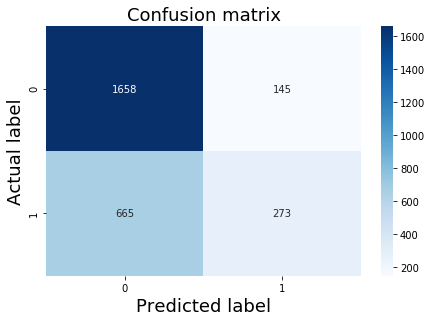

In [81]:
def predict(df,thresh=0.5):
    y_hat_prob= model.predict(df)
    y_hat=(y_hat_prob >= thresh) * 1
    
    return y_hat

y_hat= predict(X_test)
cnf_matrix=metrics.confusion_matrix(y_hat,y_test)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=10,fontsize=18)
plt.ylabel('Actual label',fontsize=18)
plt.xlabel('Predicted label',fontsize=18)

#### 3.6 Run classification report.  

**Precision**: The ability of the classifier NOT to label as positive a sample that is negative.  
**Recall**: The ability of the classifier to find all the positive samples.

From the report below we can see that recall is 70%.  This means that out of all the customers that responded "Yes", we managed to label 70% of them correctly using the predictor variables we selected.  

Precision average is also high at 82%

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      2323
           1       0.29      0.65      0.40       418

    accuracy                           0.70      2741
   macro avg       0.61      0.68      0.60      2741
weighted avg       0.82      0.70      0.74      2741



In [91]:
test=classification_report(y_test, y_hat)


#### 3.7 Plotting the Receiver Operating Characteristic (ROC) curve

We can see that the Area Under the Curve (AUC) is 0.68 which means that the model is correctly predicting the customers' response approx 70% of the time.

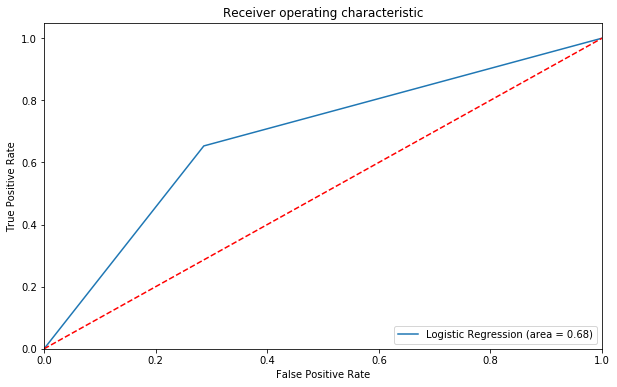

In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_hat)
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

### 4: Model Improvement
We examine the relationship between threshold and precision of the model

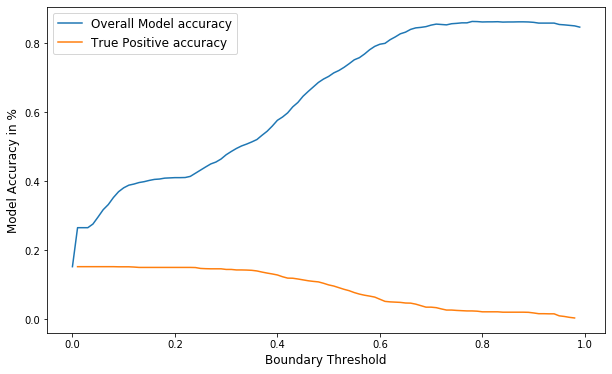

In [97]:
## Returns the accuracy of the true positive

def true_pos(cm):
    num= cm.iloc[1,1]
    denom = np.sum(np.sum(cm))
    out= num/denom
    
    return out

def accuracy(predicted,actual):
    
    diff= predicted - actual
    total = len(diff)
    incorrect= np.count_nonzero(diff)
    
    result= (total - incorrect) / total
    
    return result



decision_boundaries= np.arange(0,1,0.01)
accuracies=[]
db=[]
for i in range(len(decision_boundaries)):
    try:
        p= decision_boundaries[i]
        y_hat= predict(X_test,thresh=p)
        cm= pd.crosstab(y_hat,y_test)
        
        accuracies.append(true_pos(cm))
        db.append(p)
        
    
    except:
        pass

accuracies_2=[]
for i in range(len(decision_boundaries)):
    p = decision_boundaries[i]
    y_hat= predict(X_test,thresh=p)
    accuracies_2.append(accuracy(y_hat,y_test))
    
plt.figure(figsize=(10,6))

plt.plot(decision_boundaries,accuracies_2)
plt.plot(db,accuracies)
plt.xlabel('Boundary Threshold',fontsize=12)
plt.ylabel('Model Accuracy in %',fontsize=12)
#plt.axvline(0.23, color='red')
plt.legend(('Overall Model accuracy','True Positive accuracy','Optimum Point'),fontsize=12)
plt.show()
    

**Conclusion:**  
This graph visualizes an interesting tradeoff.   
As we increase the boundary threshold, we increase the overall model accuracy at the expense of True positive accuracy. 

Although no ideal optimum points exist (we used a **0.5** threshold previously), we can use this as a guideline to fine tune our desired outcome.